In [3]:
import os
import pandas as pd

df = pd.read_csv("../data/processed/20news_processed.csv")

In [4]:
df.head()

,text,label,clean_text
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,xref cantaloupe srv c cmu edu alt atheism alt ...
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupe srv c cmu edu alt atheism alt ...
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups alt atheism path cantaloupe srv c c...
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupe srv c cmu edu alt atheism alt ...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupe srv c cmu edu alt atheism soc ...


In [5]:
df['label'].value_counts()

label
alt.atheism                 1000
comp.graphics               1000
comp.os.ms-windows.misc     1000
comp.sys.ibm.pc.hardware    1000
comp.sys.mac.hardware       1000
comp.windows.x              1000
misc.forsale                1000
rec.autos                   1000
rec.motorcycles             1000
rec.sport.baseball          1000
rec.sport.hockey            1000
sci.crypt                   1000
sci.electronics             1000
sci.med                     1000
sci.space                   1000
talk.politics.guns          1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

In [6]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['text_length'].describe()

count    19997.000000
mean       302.378807
std        510.959765
min         21.000000
25%        126.000000
50%        195.000000
75%        314.000000
max      11839.000000
Name: text_length, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         19997 non-null  object
 1   label        19997 non-null  object
 2   clean_text   19997 non-null  object
 3   text_length  19997 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.0+ KB


In [8]:
df.isnull().sum()

text           0
label          0
clean_text     0
text_length    0
dtype: int64

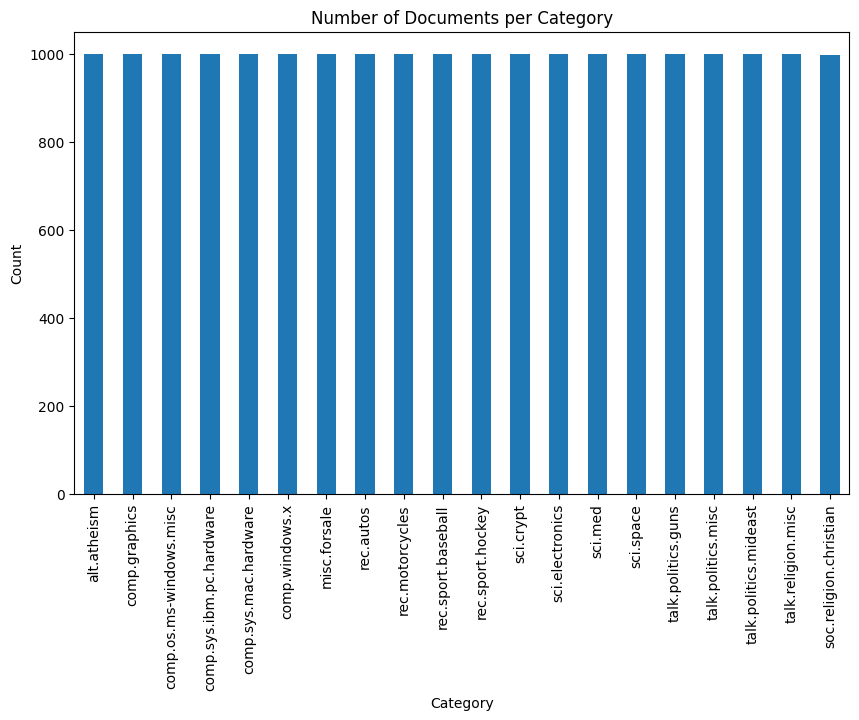

In [9]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title("Number of Documents per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [10]:
print(df.loc[0, 'text'])  # bài viết đầu tiên
print(df.loc[0, 'label']) # nhãn của bài viết

Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126
Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew
From: mathew <mathew@mantis.co.uk>
Newsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers
Subject: Alt.Atheism FAQ: Atheist Resources
Summary: Books, addresses, music -- anything related to atheism
Keywords: FAQ, atheism, books, music, fiction, addresses, contacts
Message-ID: <19930329115719@mantis.co.uk>
Date: Mon, 29 Mar 1993 11:57:19 GMT
Expires: Thu, 29 Apr 1993 11:57:19 GMT
Followup-To: alt.atheism
Distribution: world
Organization: Mantis Consultants, Cambridge. UK.
Approved: news-answers-request@mit.edu
Supersedes: <19930301143317@mantis.co.uk>
Lines: 290

Archive-name: atheism/resources
Alt-atheism-archive-name: resources
Last-modified: 11 December

# Phân tích từ vựng cơ bản

In [11]:
import re

df['tokens'] = df['text'].apply(lambda x: re.findall(r'\w+', x.lower()))

In [12]:
from collections import Counter

all_words = []
df['tokens'].apply(lambda x: all_words.extend(x))
word_freq = Counter(all_words)
print(word_freq.most_common(50))

[('the', 256554), ('edu', 164007), ('to', 133963), ('of', 122352), ('a', 111810), ('and', 102358), ('i', 92113), ('in', 87007), ('is', 75575), ('that', 70765), ('ax', 62416), ('it', 58816), ('cmu', 52409), ('for', 50392), ('com', 50158), ('you', 48181), ('cs', 45142), ('from', 39705), ('s', 38677), ('on', 35557), ('this', 34706), ('news', 34309), ('not', 33478), ('be', 33017), ('srv', 32359), ('are', 32241), ('t', 32114), ('have', 32002), ('with', 30225), ('as', 27875), ('1', 26135), ('cantaloupe', 26048), ('or', 25971), ('net', 25459), ('was', 24239), ('if', 24220), ('but', 23264), ('they', 23205), ('message', 21954), ('subject', 21589), ('lines', 20894), ('date', 20787), ('id', 20695), ('apr', 20510), ('newsgroups', 20404), ('path', 20369), ('can', 20028), ('organization', 19840), ('at', 19574), ('by', 19533)]


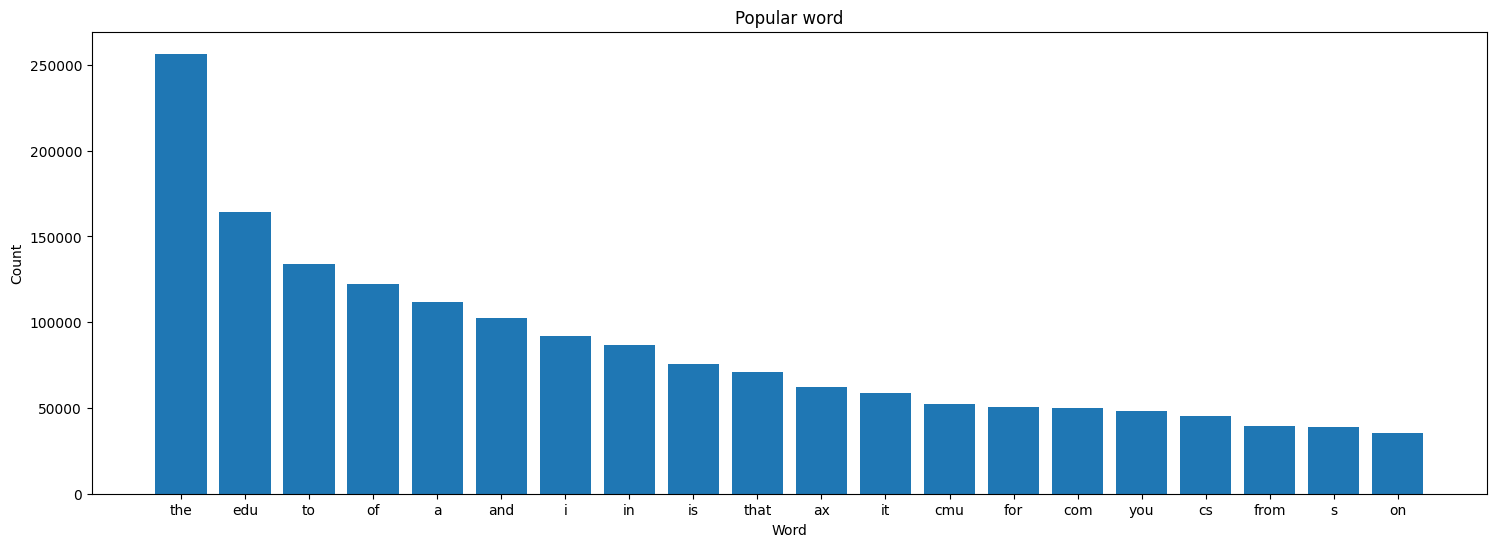

In [13]:
# Tách danh sách từ và số lần xuất hiện
words, counts = zip(*word_freq.most_common(20))

# Vẽ biểu đồ
plt.figure(figsize=(18, 6))
plt.bar(words, counts)
plt.title("Popular word")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

Phân phối độ dài văn bản trước và sau tiền xử lý

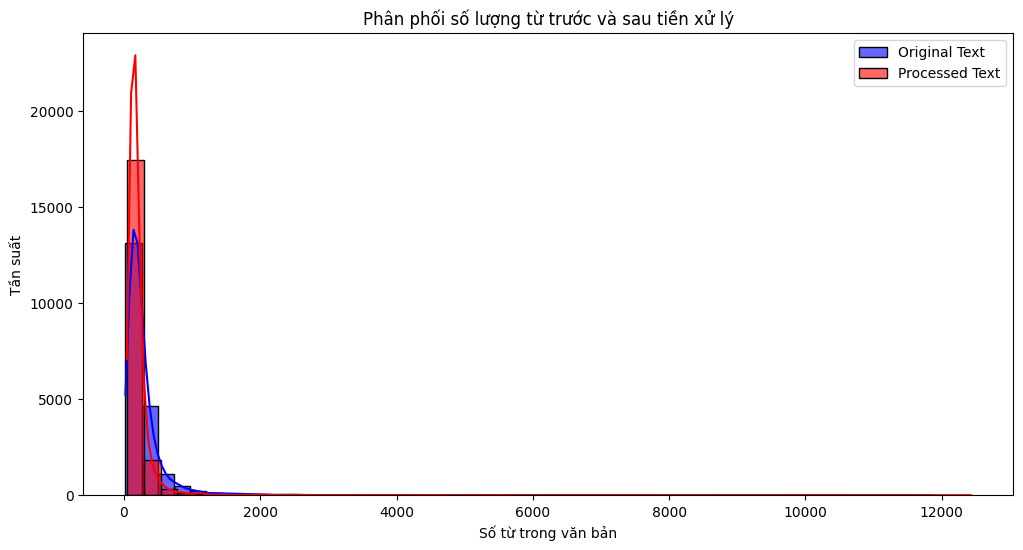

In [15]:
import seaborn as sns

df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
df["clean_text_length"] = df["clean_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 6))
sns.histplot(df["text_length"], bins=50, kde=True, label="Original Text", color="blue", alpha=0.6)
sns.histplot(df["clean_text_length"], bins=50, kde=True, label="Processed Text", color="red", alpha=0.6)
plt.xlabel("Số từ trong văn bản")
plt.ylabel("Tần suất")
plt.title("Phân phối số lượng từ trước và sau tiền xử lý")
plt.legend()
plt.show()

So sánh số lượng ký tự trước và sau xử lý

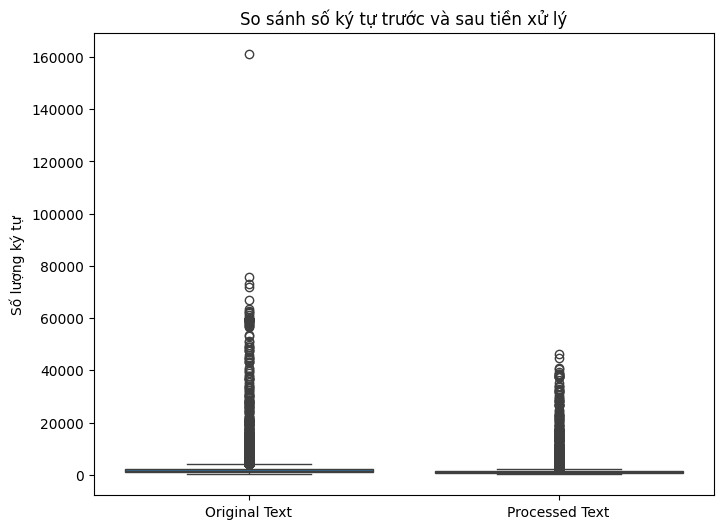

In [16]:
df["char_length_text"] = df["text"].apply(lambda x: len(str(x)))
df["char_length_clean_text"] = df["clean_text"].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[["char_length_text", "char_length_clean_text"]])
plt.xticks([0, 1], ["Original Text", "Processed Text"])
plt.ylabel("Số lượng ký tự")
plt.title("So sánh số ký tự trước và sau tiền xử lý")
plt.show()

Từ phổ biến nhất trước và sau xử lý

C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_17216\412539850.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=top_words_orig, palette="Blues_r")
C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_17216\412539850.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="word", x="count", data=top_words_clean, palette="Reds_r")


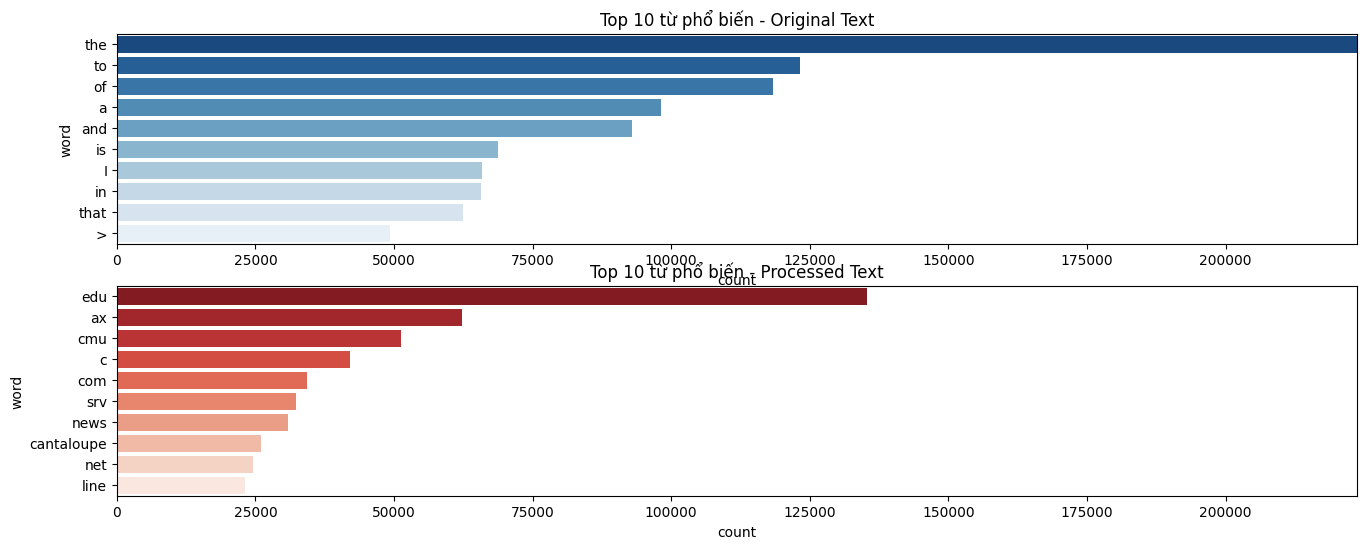

In [23]:
from collections import Counter

def get_top_n_words(text_column, n=10):
    words = " ".join(text_column).split()
    return pd.DataFrame(Counter(words).most_common(n), columns=["word", "count"])

top_words_orig = get_top_n_words(df["text"], 10)
top_words_clean = get_top_n_words(df["clean_text"], 10)

# Tìm giá trị count lớn nhất để đặt giới hạn trục y
max_count = max(top_words_orig["count"].max(), top_words_clean["count"].max())

plt.figure(figsize=(16, 6))

plt.subplot(2, 1, 1)
sns.barplot(y="word", x="count", data=top_words_orig, palette="Blues_r")
plt.xlim(0, max_count)  # Đặt cùng giới hạn trục x
plt.title("Top 10 từ phổ biến - Original Text")

plt.subplot(2, 1, 2)
sns.barplot(y="word", x="count", data=top_words_clean, palette="Reds_r")
plt.xlim(0, max_count)  # Đặt cùng giới hạn trục x
plt.title("Top 10 từ phổ biến - Processed Text")

plt.show()